# Reducing Dimensions with PCA
Principal Component Analysis (PCA) is a technique used to reduce the dimensions of a dataset. We'll use the iris dataset to step through the process of standardizing the data, calculating the covariance matrix, finding the eigenvalues and eigenvectors, and calculating the principal components.

## Setup and Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from pandas.plotting import scatter_matrix

In [2]:
# Load the iris dataset in a dataframe
iris = load_iris(as_frame=True)
iris_df = iris.data
iris_target = iris.target

In [3]:
# Print info about iris dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## Data Exploration

In [4]:
# Find basic description statistics of the iris dataset using pandas
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
observation_size = iris_df.shape[0]
feature_size = iris_df.shape[1]
print(f"The shape of the iris dataset is:\nObservations: {observation_size}\nFeatures: {feature_size}")

The shape of the iris dataset is:
Observations: 150
Features: 4


In [6]:
# Calculate the correlation matrix of the iris dataset. Notice that the correlation matrix is the same as the covariance matrix when the data is standardized.
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

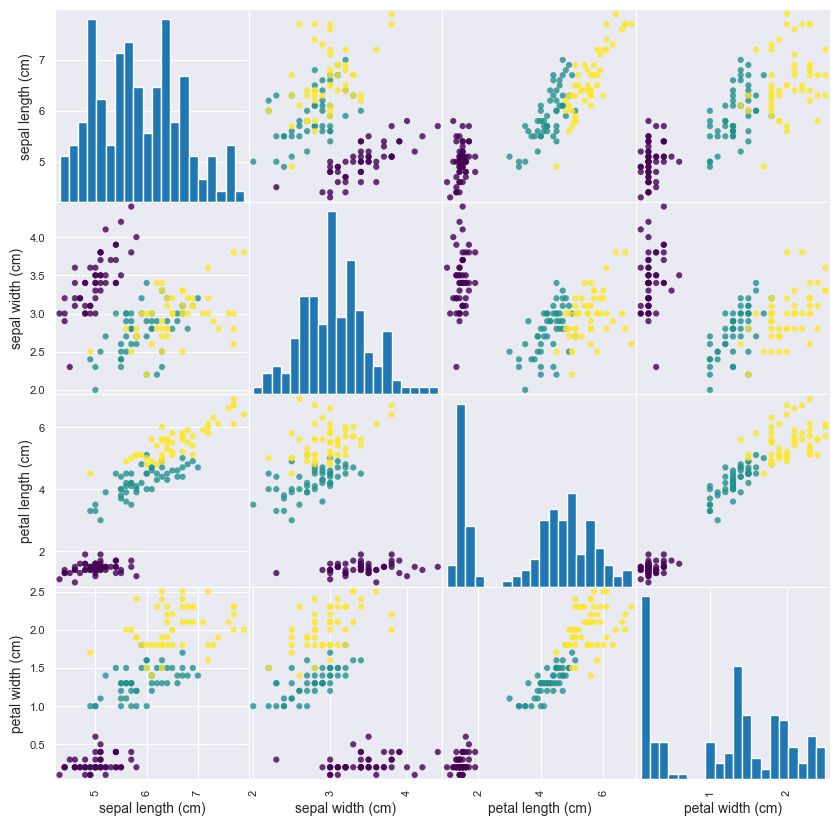

In [7]:
# Plot the scatter matrix of the iris dataset. This gives a visual representation of the relationships between the features.
figsize = (10, 10)
marker = 'o'
cmap = 'viridis'
hist_kwds = {'bins': 20}
s = 20
alpha = 0.8
# plot scatter matrix
scatter_matrix(iris_df, c=iris_target, figsize=figsize, marker=marker, hist_kwds=hist_kwds, s=s, alpha=alpha, cmap=cmap)

## Standardizing the Data

In [8]:
# Standardize the iris dataset so it has zero mean and unit variance
# Standardize by subtracting the mean and dividing by the standard deviation
iris_df = (iris_df - iris_df.mean()) / iris_df.std()

In [9]:
# Check the mean and standard deviation of the standardized iris dataset, should be close to 0 and 1 respectively. Run .describe().round(5) to see the statistics.
iris_df.describe().round(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00000,150.00000,150.00000,150.00000
mean,-0.00000,-0.00000,-0.00000,-0.00000
std,1.00000,1.00000,1.00000,1.00000
min,-1.86378,-2.42582,-1.56234,-1.44224
25%,-0.89767,-0.59040,-1.22246,-1.17986
50%,-0.05233,-0.13154,0.33535,0.13207
75%,0.67225,0.55675,0.76021,0.78803
max,2.48370,3.08046,1.77987,1.70638


In [10]:
# Calculate the covariance matrix of the standardized iris dataset
cov_matrix = iris_df.cov()

In [11]:
# Print the shape of the covariance matrix
print(f"The shape of the covariance matrix is: {cov_matrix.shape}")
# Print the covariance matrix
cov_matrix

The shape of the covariance matrix is: (4, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## Calculating the Principal Components

In [12]:
# Calculate the eigenvalues and eigenvectors of the covariance matrix
# linalg is a subpackage of numpy that contains functions for linear algebra
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html#numpy.linalg.eig
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [13]:
# sort the eigenvalues and eigenvectors in descending order
eigenvalues_idx = np.flip(eigenvalues.argsort())
eigenvalues = eigenvalues[eigenvalues_idx]
eigenvectors = eigenvectors[:, eigenvalues_idx]

In [14]:
eigenvectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [15]:
# Calculate the principal components of the iris dataset using the eigenvectors
# The principal components are the dot product of the standardized iris dataset and the eigenvectors.
# This is called the eigendecomposition of the covariance matrix.
prin_comp_evd = iris_df.dot(eigenvectors)

In [16]:
prin_comp_evd

,0,1,2,3
0,-2.257141,-0.478424,-0.127280,0.024088
1,-2.074013,0.671883,-0.233826,0.102663
2,-2.356335,0.340766,0.044054,0.028282
3,-2.291707,0.595400,0.090985,-0.065735
4,-2.381863,-0.644676,0.015686,-0.035803
...,...,...,...,...
145,1.864258,-0.385674,0.255418,0.387957
146,1.559356,0.893693,-0.026283,0.219457
147,1.516091,-0.268171,0.179577,0.118773
148,1.368204,-1.007878,0.930279,0.026041


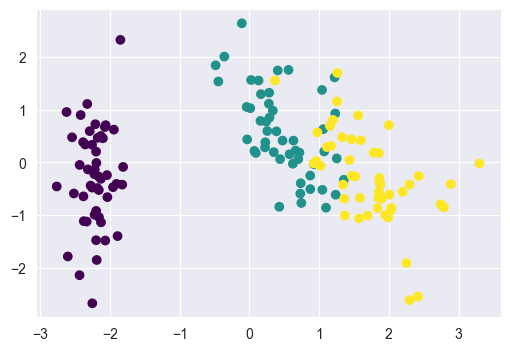

In [17]:
# Plot the first two principal components of the iris dataset
first_component = prin_comp_evd.iloc[:, 0]
second_component = prin_comp_evd.iloc[:, 1]
plt.figure(figsize=(6, 4))
plt.scatter(first_component, second_component, c=iris_target, cmap='viridis')

## A Note on Orientation
Sometimes if you are comparing different PCA methods your data might differ in orientation.  
Don't worry about the orientation of the plot, the important thing is the distribution of the data points.  
If the data points appear to be separated, then PCA is working!

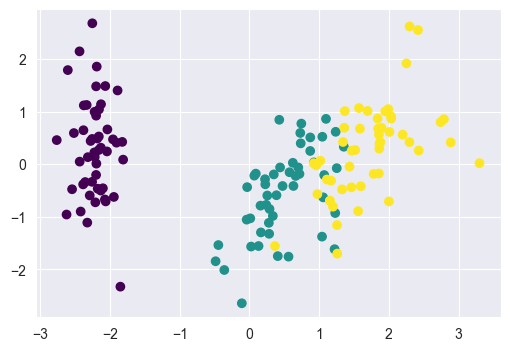

In [18]:
# An example of one of the principal components being flipped can be seen in the plot below.
plt.figure(figsize=(6, 4))
plt.scatter(first_component, second_component * -1, c=iris_target, cmap='viridis')

## End of Exercise Question
How does plotting of the first two principal components of the iris dataset help us understand the distribution of the data? How is it similar to the scatter matrix plot?

Plotting of the first two principal components of the iris dataset helps us understand the distribution of the data by showing the spread of the data points in a lower-dimensional space using the two highest variance directions automatically determined by PCA.

Both the plot of the first two principal components and the scatter matrix plot try to visualize relationships between variables and reveal patterns in the data. Their similarity lies in the fact that they both show the distribution of the data points, although in different spaces. Furthermore, to determine the best representation of the data in the scatter plot, we would need to manually select the two features to plot!